# Teoria de la informacion

- Link base [Informacion Mutua](https://phuijse.github.io/UACH-INFO185/clases/unidad1/10_codificación_de_canal.html)



In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Informacion Mutua

La información mutua entre dos variables aleatorias $X$ e $Y$ se puede definir de varias maneras

$$
\begin{align}
\text{MI}(X, Y) &= H(X) + H(Y) - H(X, Y)   \\
&= H(Y) - H(X|Y)  \\ 
&= H(X) - H(Y|X)   
\end{align}
$$

donde 

$H(X,Y)$ es la entropía conjunta 
> Mide  la cantidad de información promedio en bits de $X$ e $Y$

$H(X|Y)$ es la entropía de $X$ condicionada en $Y$
> Cantidad de información promedio en bits de $X$ considerando que conocemos $Y$ o también la "Incerteza de $X$ dado que observamos $Y$"

Se cumple que $H(X)+H(Y) \geq H(X,Y)$ por lo tanto $\text{MI}(X,Y) \geq 0$

Si $X$ e $Y$ son independientes entonces $H(X|Y)=H(X)$ y $H(X,Y) = H(X) + H(Y)$ y $\text{MI}(X,Y) = 0$

> La información mutua mide la información compartida por $X$ e $Y$, es decir que tan dependientes son entre sí

La información mutua nos dice 

- la información promedio en bits que ganamos sobre $Y$ dado que observamos $X$ (y viceverza)
- la incerteza promedio de $Y$ que eliminamos al conocer $X$ 

## Canal con ruido

Hasta ahora hemos asumido que el canal está libre de ruido

El objetivo original de Shannon era

> "Comunicación robusta a través de un canal ruidoso"

El ruido disminuye la **capacidad** del canal

**Ejemplo:** Un cisne navegando por  un canal ruidoso

Imagemos que queremos transmitir una imagen binaria $X$ por un canal con ruido. Asumamos que el canal le cambia el valor a un 10% de los píxeles y llamemos $Y$ a la imagen que sale del canal. ¿Cómo afecta esto la información mutua entre $X$ e $Y$?

```{note}
Este canal de comunicación se conoce como [canal binario simétrico](https://en.wikipedia.org/wiki/Binary_symmetric_channel)
```

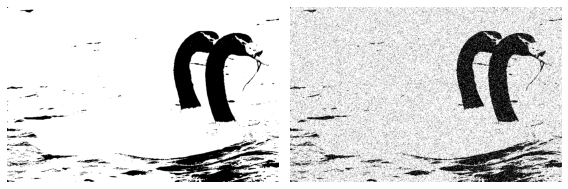

In [3]:
fig, ax = plt.subplots(1, 2, figsize = (8,3), tight_layout = True)
plt.rcParams['image.cmap'] = 'gray'

th_binary, p_noise = 0.5, 0.1
img_swan_gray = plt.imread('../MutualInformation/images/gray-swan.png')[:, :, 0]
img_swan = (img_swan_gray > th_binary).astype('uint8')
Npix = len(img_swan.ravel())

p = np.random.rand(img_swan.shape[0], img_swan.shape[1])
img_noisy_swan = img_swan.copy()
mask = p <= p_noise
img_noisy_swan[mask] = 1-img_noisy_swan[mask]

ax[0].imshow(img_swan); ax[0].axis('off')
ax[1].imshow(img_noisy_swan); ax[1].axis('off');

¿Cual es la entropía de cada imagen?

In [4]:
def entropy_binary_image(img):
    p = np.count_nonzero(img.ravel())/len(img.ravel())
    return -p*np.log2(p) - (1-p)*np.log2(1-p)

HX = entropy_binary_image(img_swan)
HY = entropy_binary_image(img_noisy_swan)
print("Entropía imagen limpia H(X): {0:0.4f} [bits/pixel]".format(HX))
print("Entropía imagen sucia H(Y): {0:0.4f} [bits/pixel]".format(HY))

Entropía imagen limpia H(X): 0.5767 [bits/pixel]
Entropía imagen sucia H(Y): 0.7403 [bits/pixel]


¿Cual es la entropía conjunta?

In [5]:
Npix = len(img_swan.ravel())
p00 = np.count_nonzero((img_swan == 0) & (img_noisy_swan == 0))/Npix
p01 = np.count_nonzero((img_swan == 0) & (img_noisy_swan == 1))/Npix
p10 = np.count_nonzero((img_swan == 1) & (img_noisy_swan == 0))/Npix
p11 = np.count_nonzero((img_swan == 1) & (img_noisy_swan == 1))/Npix
print(np.array([p00, p01, p10, p11]))

HXY = -(p00*np.log2(p00) + p01*np.log2(p01) + p10*np.log2(p10) + p11*np.log2(p11))
print("Entropía conjunta H(X,Y): {0:0.6f} [bits/pixel]".format(HXY))

[0.12349921 0.01363173 0.0859071  0.77696196]
Entropía conjunta H(X,Y): 1.044207 [bits/pixel]


¿Cuáles son las entropía condicionales?

In [6]:
print("H(X|Y): {0:0.6f} [bits/pixel]".format(HXY-HY))
print("H(Y|X): {0:0.6f} [bits/pixel]".format(HXY-HX))

H(X|Y): 0.303861 [bits/pixel]
H(Y|X): 0.467532 [bits/pixel]


¿Cual es la información mutua?

In [7]:
MIXY = HX + HY - HXY
print("Información mutua IM(X,Y): {0:0.6f} [bits/pixel]".format(MIXY))

Información mutua IM(X,Y): 0.272814 [bits/pixel]


¿Cúal es la entropía del ruido?

In [8]:
H_noise = -p_noise*np.log2(p_noise) - (1-p_noise)*np.log2(1-p_noise)
print("Entropía del ruido H(N): {0:0.6f} [bits/pixel]".format(H_noise))

Entropía del ruido H(N): 0.468996 [bits/pixel]


Consideremos que $Y = X + N$

Entonces

$$
H(Y|X) = H(X+N|X) = H(N|X) = H(N)
$$

```{note}
En un canal ruidoso la entropía condicional de la salida dada la entrada es equivalente a la entropía del ruido añadido a la entrada
```

<img src="..MutualInformation/images/entropy_mi_diagram.png" width="500">

La eficiencia de la transmisión está dada por la proporción de entropía de $Y$ que es compartida por $X$

$$
E = \frac{\text{MI}(X,Y)}{H(Y)} \in [0, 1]
$$

Para este caso tenemos

In [9]:
MIXY/HY

0.3684956215907062

Es decir que un 37% de la entropía de la salida depende de la entrada

```{admonition} Pregunta
:class: tip
¿Qué ocurre con la información mutua y con la eficiencia de transmisión cuando el canal se vuelve más o menos ruidoso?
```

## Corrección de errores debidos al ruido

Queremos ser capaces de recuperar X a partir de Y

Cuando el canal tiene ruido necesitamos robustecer el código de X

Esto se logra agregando **redundancia** a nuestro código

- Enviar el mensaje varias veces: **repetition code**
- Agregar al código uno o más **bits de paridad**


**Ejemplo 1:** *repetition code*

Si queremos enviar 0110011 lo repetimos una cierta cantidad de veces

$X$ = 000 111 111 000 000 111 111 

$N$ = 001 000 000 000 000 110 000

$Y$ = 001 111 111 000 001 001 111

Si aplicamos decodificación por mayoría: 0 1 1 0 0 **0** 1

- Reducimos la probabilidad de error por un factor de 3 
- Reducimos la tasa de transmisión en un factor de 3

La tasa de transmisión es $R = k/n = 1/3$ donde $k$ son los bits de información y $n$ los bits transmitidos

**Ejemplo 2:** paridad

Sea una tira binaria de 16 bits $s=[0,1,0,1,0,0,0,0,1,1,1,0,0,1,1,0]$ Se ordena como una matriz de 4x4

$$
\begin{array}{|c c c c|c}
  0 & 1 & 0 & 1 & 0\\
  0 & 0 & 0 & 0 & 0\\
  1 & 1 & 1 & 0 & 1\\
  0 & 1 & 1 & 0 & 0 \\ \hline
  1 & 1 & 0 & 1 & 
\end{array}
$$

Si el número de 1's de una fila o columna es par se agrega un 0, de lo contrario se agrega un 1

Finalmente se crea una nueva tira de largo 24

$s_p=[0,1,0,1,\textbf{0}, 0,0,0,0,\textbf{0}, 1,1,1,0, \textbf{1}, 0,1,1,0, \textbf{0}, \textbf{1}, \textbf{1}, \textbf{0}, \textbf{1}]$ 

- Al recibir este código se comprueba que las paridades estén bien
- Si no lo están podriamos pedir nuevamente la tira binaria
- Aumentamos el mensaje de 16 a 24 [bits], la tasa es $R=16/24=0.666$

**Ejercicio propuesto:** 

Si tengo un string de NxN de largo y quiero proteger con bits de paridad ¿Cúantos bits agrego?


## Teorema de codificación de canal de Shannon (*Channel coding theorem*)

Se define la capacidad de un canal con entrada $X$ y salida $Y$ como

$$
C = \max_{P(X)} \text{MI}(X,Y) ~\text{[bits/símbolo]} 
$$

La distribución $P^*(X)$ que maximiza la capacidad del canal es la distribución de entrada óptima para ese canal. Si el canal no tuviera ruido entonces $Y=X$ y la capacidad está dada por la entropía de $X$. El ruido disminuye la capacidad de un canal

Al respecto Shannon enunció el siguiente teorema

> Sea un canal con capacidad $C$ y una fuente $X$ que transmite a una tasa de $R$

>Si $R \leq C$ entonces existe un largo de codificación para $X$ que puede transmitirse con error arbitrariamente pequeño

> Para una probabilidad de error de bit aceptable $p_e$, se puede alcanzar una tasa de transmisión

$$
R(p_e) = \frac{1}{1 + p_e \log_2(p_e) + (1-p_e) \log_2(1-p_e)}
$$

> Para un cierto $p_e$ no es posible alcanzar una tasa mayor a $R(p_e)$

**Ejemplo:** Canal binario simétrico

¿Cuál es la distribución de entrada que maximiza la información mutua del canal?

Respondamos en primer lugar usando Python

'El mejor umbral es 0.6793'

'La IM alcanzada es 0.5312'

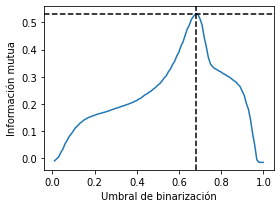

In [10]:
p_flip, tol = 0.1, 1e-2
np.random.seed(0)
seed_image = np.random.rand(img_swan_gray.shape[0], img_swan_gray.shape[1])
flip_mask = np.random.rand(img_swan_gray.shape[0], img_swan_gray.shape[1]) <= p_flip

binarization_threshold = np.linspace(0.01, 0.999, num=100)
MIXY = []
for th in binarization_threshold:
    # Aplicamos el umbral de binarización
    img_X = (img_swan_gray > th).astype('uint8')
    img_Y = img_X.copy()
    # Simulamos la perturbación del canal
    img_Y[flip_mask] = 1 - img_Y[flip_mask] 
    # Calculamos las entropías y la IM
    p00 = np.count_nonzero((img_X == 0) & (img_Y == 0))/Npix
    p01 = np.count_nonzero((img_X == 0) & (img_Y == 1))/Npix
    p10 = np.count_nonzero((img_X == 1) & (img_Y == 0))/Npix
    p11 = np.count_nonzero((img_X == 1) & (img_Y == 1))/Npix
    HX = -(p00 + p01)*np.log2(p00 + p01+tol) -(p10 + p11)*np.log2(p10 + p11+tol)
    HY = -(p00 + p10)*np.log2(p00 + p10+tol) -(p01 + p11)*np.log2(p01 + p11+tol)
    HXY= -(p00*np.log2(p00+tol) + p01*np.log2(p01+tol) + p10*np.log2(p10+tol) + p11*np.log2(p11+tol))
    MIXY.append(HX + HY - HXY)
    

fig, ax = plt.subplots(figsize=(4, 3), tight_layout=True) 
best_th = binarization_threshold[np.argmax(MIXY)]
ax.plot(binarization_threshold, MIXY); 
ax.axhline(np.amax(MIXY), c='k', ls='--')
ax.axvline(binarization_threshold[np.argmax(MIXY)], c='k', ls='--')
ax.set_ylabel('Información mutua')
ax.set_xlabel('Umbral de binarización');
display(f"El mejor umbral es {binarization_threshold[np.argmax(MIXY)]:0.4f}",
        f"La IM alcanzada es {np.amax(MIXY):0.4f}")

Veamos ahora si podemos llegar a la misma solución de forma teórica

Digamos que la imagen de entrada binaria se obtiene aplicando un umbral $p$, es decir que si el pixel original en escala de grises es mayor que $p$ entonces el resultado $1$ de lo contrario es $0$.

Con esto podemos escribir las *probabilidades a priori* de cada pixel como

- $P(X=0)=p$
- $P(X=1)=(1-p)$ 

Dijimos que el canal cambia un 10\% de los pixeles de la entrada. Entonces las verosimilitudes son $P(Y=1|X=1) = 0.9$, $P(Y=1|X=0) = 0.1$, $P(Y=0|X=1) = 0.1$, $P(Y=0|X=0) = 0.9$

Por ende las probabilidades marginales de la salida son:

- $P(Y=1) = \sum_x P(Y=1|X=x)P(X=x)  = 0.9(1-p) + 0.1p = 0.9 - 0.8p $
- $P(Y=0) = \sum_x P(Y=0|X=x)P(X=x)  = 0.1(1-p) + 0.9p = 0.1 + 0.8p= 1 - P(Y=1) $ 

y su entropía es 

$$
H(Y) = - (0.9 - 0.8p) \log_2(0.9 - 0.8p) - (0.1 + 0.8p) \log_2(0.1 + 0.8p)
$$

Por otro lado, la entropía condicional es 

$$
H(Y|X) = \sum_x H(Y|X=x)P(X=x) = - 0.9 \log_2(0.9) - 0.1 \log_2 (0.1),
$$

que no depende de $p$.

Podemos calcular el máximo de la información mutua usando

$$
\frac{d}{dp} \text{MI}(X,Y) = \frac{d}{dp} H(Y) - \frac{d}{dp} H(Y|X) = \frac{d}{dp} H(Y) = 0 
$$

de donde llegamos a que

$$
p^*=\frac{1}{2}
$$

Notemos que no importa que porcentaje de corrupción tenga el canal.

Finalmente la capacidad del canal es

$$
C = \text{MI}_{p^*} (X,Y) = 1 + 0.9 \log_2(0.9) + 0.1 \log_2 (0.1) = 0.531 \text{[bits]}
$$

```{note}
Si usamos $P^*$ podemos transmitir sin perdidas a una taza $R=k/n \leq 0.531$, es decir que por $k$ bits de información tenemos que transmitir al menos $2k$ bits
```



## Teorema de Shannon-Hartley

Sea un canal con ancho de banda B [Hz] (rango de frecuencias que un canal puede transmitir) y potencia de señal S [W] y potencia del ruido N [W] (aditivo blanco gaussiano), entonces su capacidad es

$$
C = B \log_2 \left(1 + \frac{S}{N} \right) \text{[bits/s]}
$$

Si la velocidad de transmisión de un canal es R [bits/s] y R < C entonces la probabilidad de errores de comunicación tiende a cero. 

Las limitaciones de un sistema de comunicación son **Ancho de banda** y el ruido **Ruido**

## Uso de la libreria sklearn

In [26]:
#from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mutual_info_score

X= np.array(img_swan).flatten()
y= np.array(img_noisy_swan).flatten()

mir = mutual_info_score(X,y)

print(mir)

0.18910053404916619


'El mejor umbral es 0.6793'

'La IM alcanzada es 0.5312'

'El mejor umbral es 0.6793'

'La IM alcanzada es 0.3698'

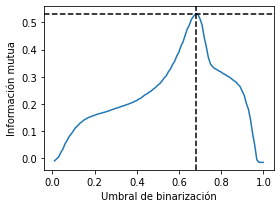

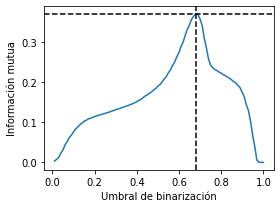

In [29]:
from sklearn.metrics import mutual_info_score

p_flip, tol = 0.1, 1e-2
np.random.seed(0)
seed_image = np.random.rand(img_swan_gray.shape[0], img_swan_gray.shape[1])
flip_mask = np.random.rand(img_swan_gray.shape[0], img_swan_gray.shape[1]) <= p_flip

binarization_threshold = np.linspace(0.01, 0.999, num=100)
MIXY = []
skMIR = []
for th in binarization_threshold:
    # Aplicamos el umbral de binarización
    img_X = (img_swan_gray > th).astype('uint8')
    img_Y = img_X.copy()
    # Simulamos la perturbación del canal
    img_Y[flip_mask] = 1 - img_Y[flip_mask] 
    # Calculamos las entropías y la IM
    p00 = np.count_nonzero((img_X == 0) & (img_Y == 0))/Npix
    p01 = np.count_nonzero((img_X == 0) & (img_Y == 1))/Npix
    p10 = np.count_nonzero((img_X == 1) & (img_Y == 0))/Npix
    p11 = np.count_nonzero((img_X == 1) & (img_Y == 1))/Npix
    HX = -(p00 + p01)*np.log2(p00 + p01+tol) -(p10 + p11)*np.log2(p10 + p11+tol)
    HY = -(p00 + p10)*np.log2(p00 + p10+tol) -(p01 + p11)*np.log2(p01 + p11+tol)
    HXY= -(p00*np.log2(p00+tol) + p01*np.log2(p01+tol) + p10*np.log2(p10+tol) + p11*np.log2(p11+tol))
    MIXY.append(HX + HY - HXY)

    X_= np.array(img_X).flatten()
    y_= np.array(img_Y).flatten()
    skMIR.append(mutual_info_score(X_,y_))


fig, ax = plt.subplots(figsize=(4, 3), tight_layout=True) 
best_th = binarization_threshold[np.argmax(MIXY)]
ax.plot(binarization_threshold, MIXY); 
ax.axhline(np.amax(MIXY), c='k', ls='--')
ax.axvline(binarization_threshold[np.argmax(MIXY)], c='k', ls='--')
ax.set_ylabel('Información mutua')
ax.set_xlabel('Umbral de binarización');
display(f"El mejor umbral es {binarization_threshold[np.argmax(MIXY)]:0.4f}",
        f"La IM alcanzada es {np.amax(MIXY):0.4f}")

fig, ax = plt.subplots(figsize=(4, 3), tight_layout=True) 
best_th = binarization_threshold[np.argmax(skMIR)]
ax.plot(binarization_threshold, skMIR); 
ax.axhline(np.amax(skMIR), c='k', ls='--')
ax.axvline(binarization_threshold[np.argmax(skMIR)], c='k', ls='--')
ax.set_ylabel('Información mutua')
ax.set_xlabel('Umbral de binarización');
display(f"El mejor umbral es {binarization_threshold[np.argmax(skMIR)]:0.4f}",
        f"La IM alcanzada es {np.amax(skMIR):0.4f}")